## numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
A = np.array([[1, 2],[3, 4]])
print(A)

[[1 2]
 [3 4]]


In [3]:
B = 2 * np.identity(2) # broadcast
print(B)

[[2. 0.]
 [0. 2.]]


In [4]:
print(A@B)
print(A*B)

[[2. 4.]
 [6. 8.]]
[[2. 0.]
 [0. 8.]]


In [5]:
print(A[0,0])
print(A[0,:])
print(A[:,0])
print(A[1,1])

1
[1 2]
[1 3]
4


In [6]:
np.ones((3,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

### numpy is different from the plain python array

In [7]:
# This isn't for mathematics
print(2 * [1,2])

[1, 2, 1, 2]


In [8]:
# This doesn't work
# print(2 * [1,2] + 1)

In [9]:
# it works with numpy
2 * np.array([1,2]) + 1

array([3, 5])

### Guess how numpy was implemented

In [10]:
class Number:
    def __init__(self, n):
        self.n = n
    def __add__(self, anotherNumber):
        return Number(self.n + anotherNumber.n + 0.01)
    def __str__(self):
        return str(self.n)
    def __repr__(self):
        return str(self)

In [11]:
a = Number(1)
b = Number(2)
c = Number(3)
a + b + c + a + b + c

12.049999999999999

## scipy and matplotlib

In [12]:
scipy.stats.uniform.rvs(size=(3,4))

array([[0.1975323 , 0.76193645, 0.92943999, 0.25304883],
       [0.95241557, 0.00323005, 0.32706368, 0.22332992],
       [0.07213704, 0.26643955, 0.92193388, 0.38948562]])

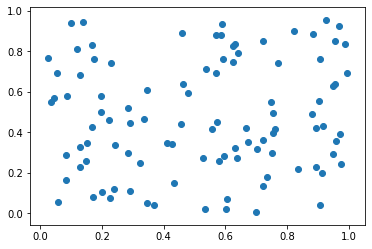

In [13]:
uniform_samples = scipy.stats.uniform.rvs(size=(100,2))
plt.scatter(x=uniform_samples[:,0], y=uniform_samples[:,1])

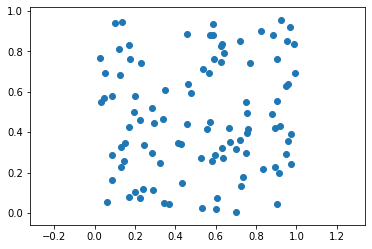

In [14]:
# ratio to be 1
fig, axs = plt.subplots(1, 1)
axs.axis('equal') # keep the ratio of x and y as the same
axs.scatter(x=uniform_samples[:,0], y=uniform_samples[:,1])
plt.show()

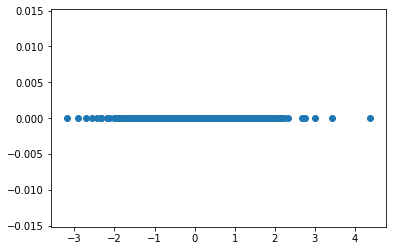

In [15]:
normal_samples = scipy.stats.norm.rvs(0, 1, size=500)
# data
plt.scatter(normal_samples, np.zeros(500))

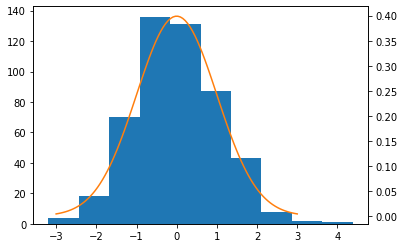

In [16]:
# draw chart
fig, axs = plt.subplots(1, 1)
axs.hist(normal_samples)

axs = axs.twinx()
x = np.linspace(-3,3,100)
y = scipy.stats.norm.pdf(x)
axs.plot(x,y, color="C1")

plt.show()

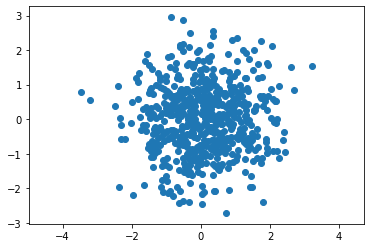

In [17]:
multivariate_normal_samples = scipy.stats.multivariate_normal.rvs(mean=(0,0), cov=((1,0),(0,1)), size=(300,2))

# draw chart
fig, axs = plt.subplots(1, 1)
axs.axis('equal') # keep the ratio of x and y as the same
axs.scatter(x=multivariate_normal_samples[:,0], y=multivariate_normal_samples[:,1])
plt.show()

## Data preparation with pandas

In [18]:
df = pd.read_csv('datasets/weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [19]:
# print(type(df))
df = df.sample(500)[['Height', 'Weight']]
df

,Height,Weight
8072,62.701034,121.771555
7967,61.225805,127.828630
9860,65.666587,129.664080
6320,60.693411,130.017848
951,67.259953,186.320797
8570,65.241429,128.721103
234,67.369809,176.636164
8442,61.318284,97.107504
5624,62.011860,122.709384
3699,69.637189,205.297105


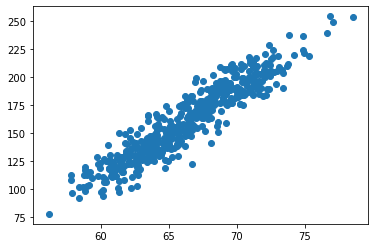

In [20]:
data = df.to_numpy()
plt.scatter(x=data[:,0], y=data[:,1])

## Draw data with Seaborn

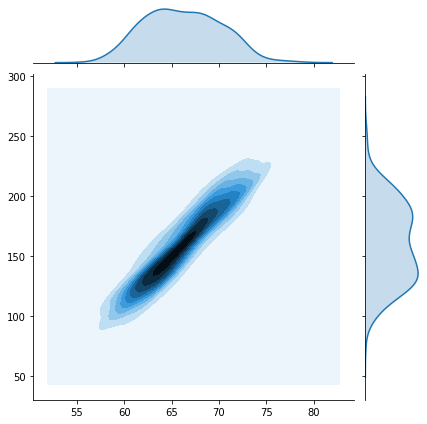

In [21]:
sns.jointplot(data[:,0], data[:,1], kind="kde")